# Importing the Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import f1_score, classification_report, recall_score
from keras import callbacks
np.random.seed(0)

# Importing the Dataset

In [2]:
data = pd.read_csv('D:\Dataset for ML\Rain In Australia\weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Data Visualization

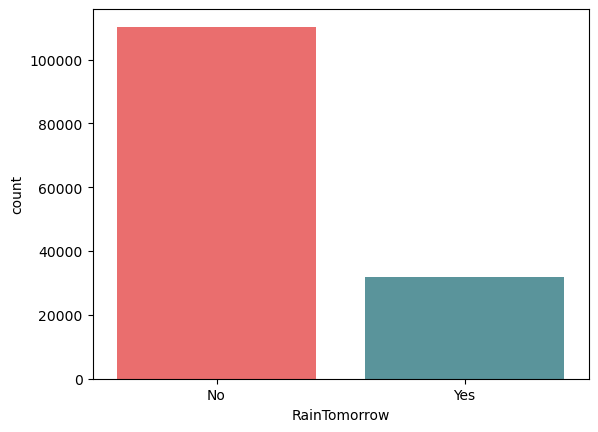

In [5]:
cols= ["#FF5959","#4F9DA6"]
sns.countplot(x= data["RainTomorrow"], palette= cols)
plt.show()

C:\Users\sweet\AppData\Local\Temp\ipykernel_9084\994253015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

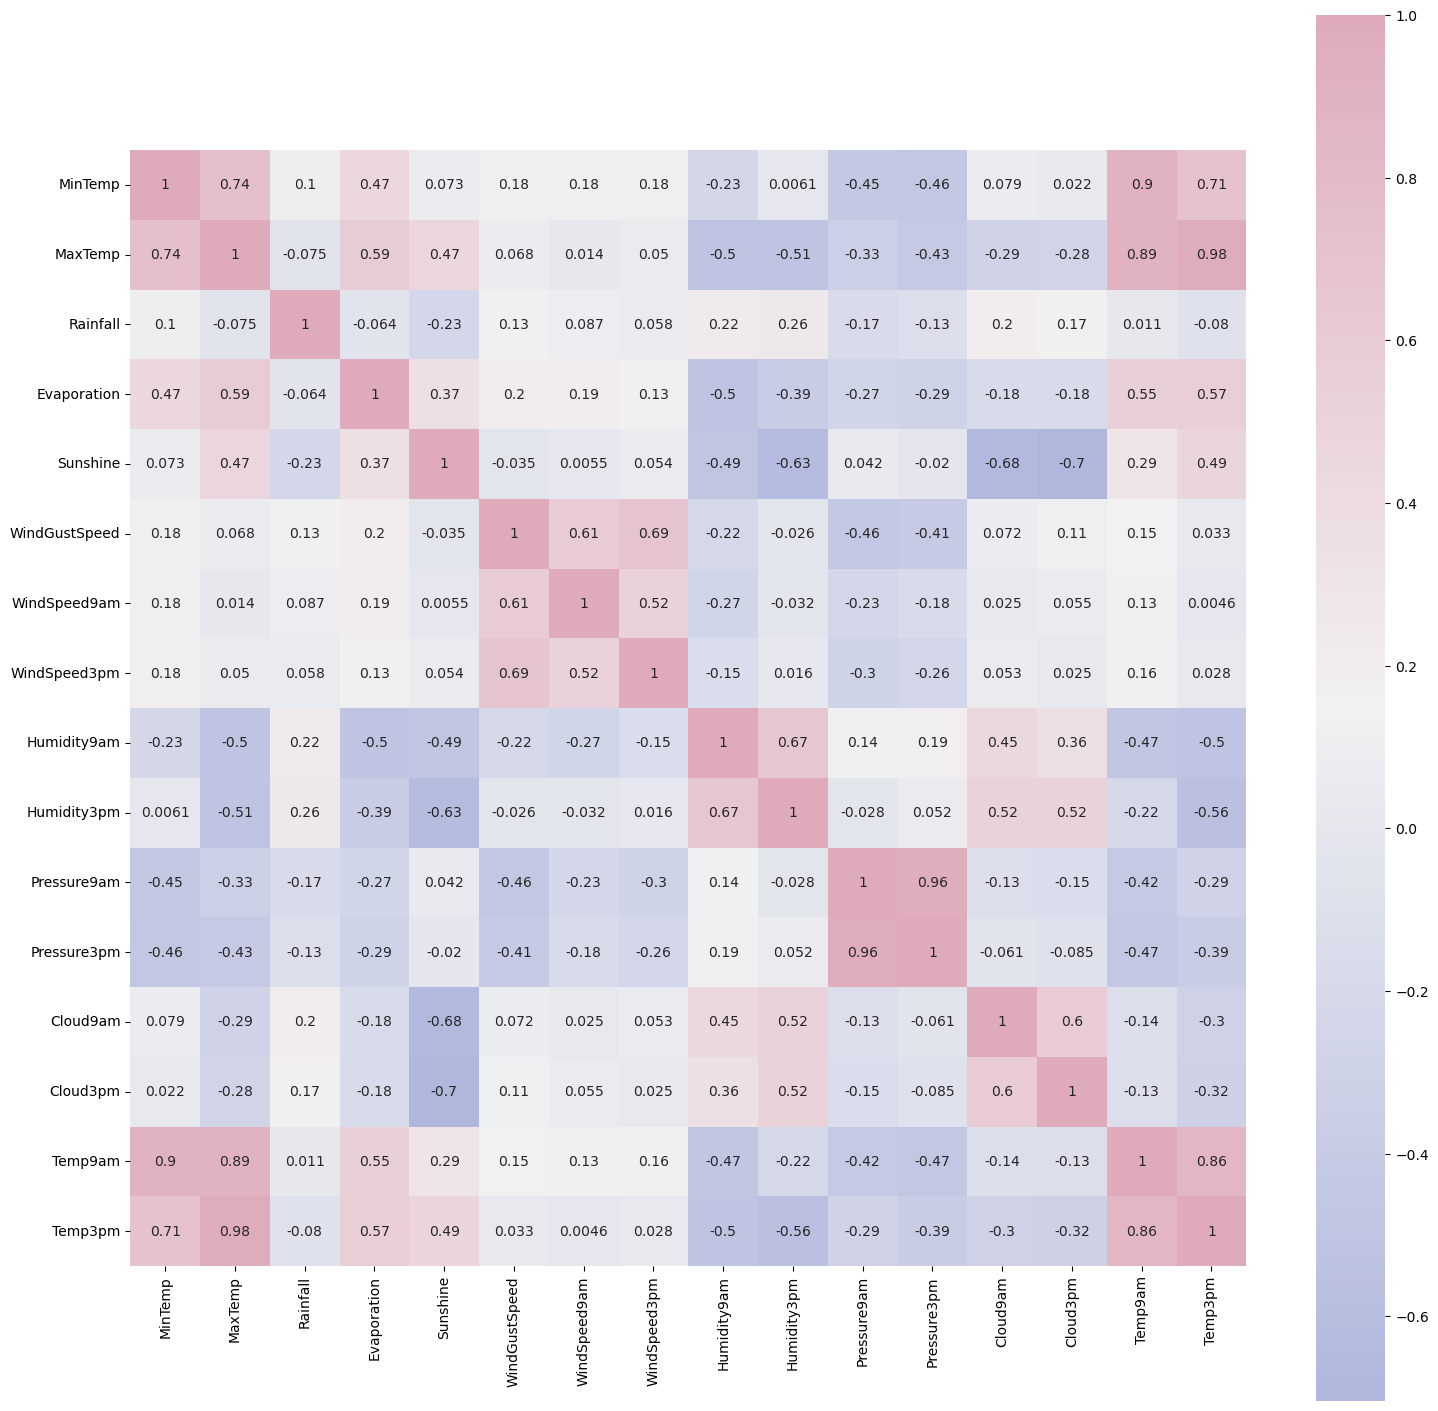

In [6]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s = 50, l = 75, n = 6, as_cmap = True)
plt.subplots(figsize = (18,18))
sns.heatmap(corrmat, annot = True, cmap = cmap, square = True)

In [7]:
lengths = data["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

In [8]:
data["Date"] = pd.to_datetime(data["Date"])

In [9]:
data["Year"] = data.Date.dt.year

In [10]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [11]:
data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

In [12]:
data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

In [13]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

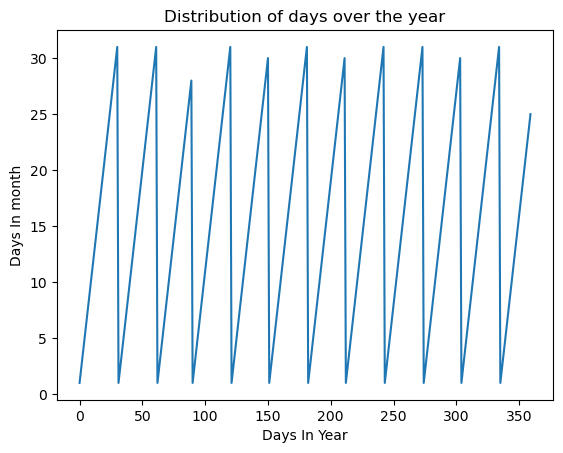

In [14]:
section = data[:360]
tm = section['day'].plot()
tm.set_title("Distribution of days over the year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'sine encoded month')

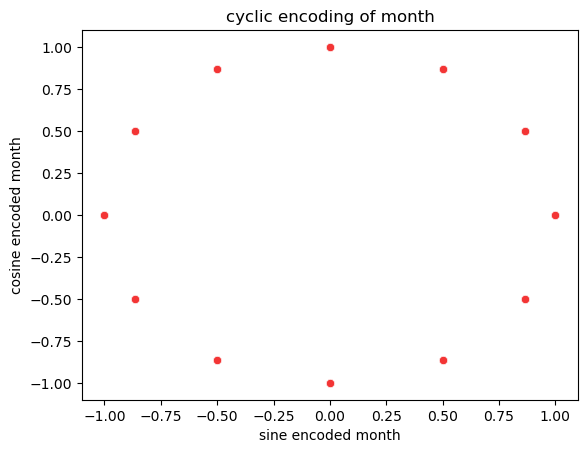

In [15]:
cyclic_month = sns.scatterplot(x = 'month_sin', y = 'month_cos', data = data, color = '#F33535')
cyclic_month.set_title("cyclic encoding of month")
cyclic_month.set_ylabel("cosine encoded month")
cyclic_month.set_xlabel("sine encoded month")

Text(0.5, 0, 'sine encoded day')

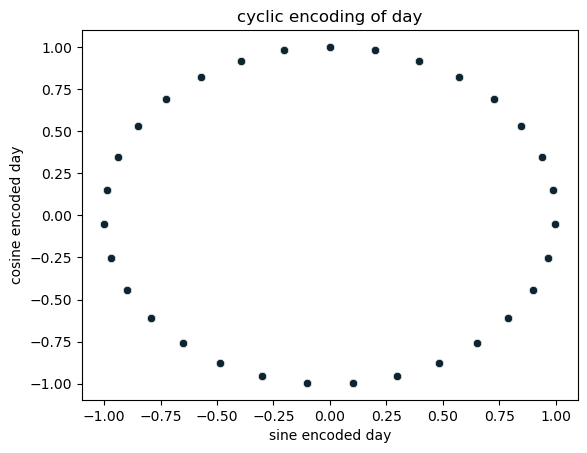

In [16]:
cyclic_day = sns.scatterplot(x = 'day_sin', y = 'day_cos', data = data, color = '#0E2431')
cyclic_day.set_title("cyclic encoding of day")
cyclic_day.set_ylabel("cosine encoded day")
cyclic_day.set_xlabel("sine encoded day")

In [17]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical Features")
print(object_cols)

Categorical Features
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [19]:
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [20]:
t = (data.dtypes =='float64')
num_cols = list(t[t].index)

print("Numerical Feature")
print(num_cols)

Numerical Feature
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [21]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [22]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

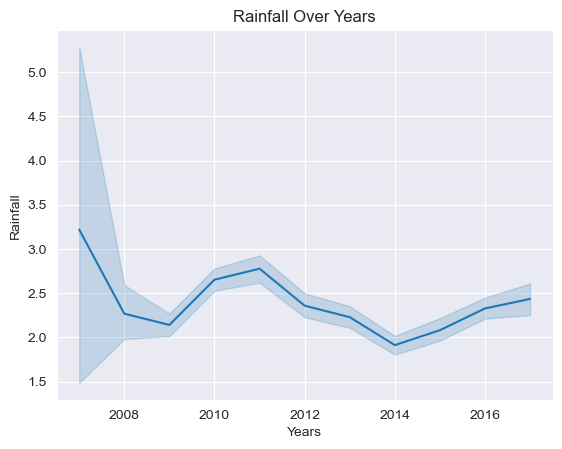

<Figure size 1000x600 with 0 Axes>

In [24]:
# Set the style before creating the plot
sns.set_style("darkgrid")

# Create the line plot
sns.lineplot(data=data, x="Year", y="Rainfall")

# Add a title
plt.title("Rainfall Over Years")

# Add labels for the axes
plt.xlabel("Years")
plt.ylabel("Rainfall")

# Adjust the size of the plot
plt.figure(figsize=(10, 6))

# Display the plot
plt.show()

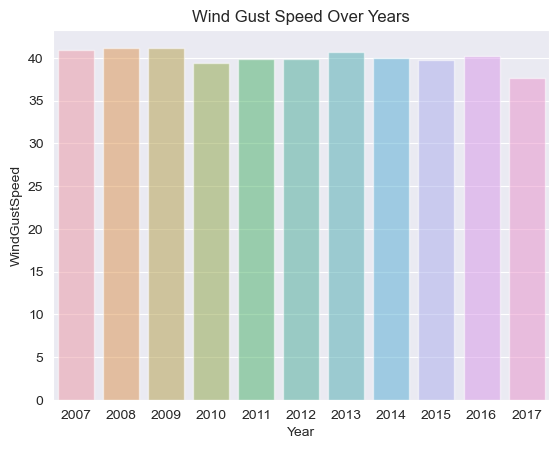

<Figure size 2000x1500 with 0 Axes>

In [25]:
# Set the style before creating the plot
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(data=data, x="Year", y="WindGustSpeed", alpha = 0.5, errorbar = None)

# Add a title
plt.title("Wind Gust Speed Over Years")

# Add labels for the axes
plt.xlabel("Year")
plt.ylabel("WindGustSpeed")

# Adjust the size of the plot
plt.figure(figsize=(20, 15))

# Display the plot
plt.show()

# Data Preprocessing

### Data Preprocessing Steps:

1. Encode categorical columns using label encoding.
2. Scale the features for normalization.
3. Identify and address outliers through data analysis.
4. Remove outliers to enhance data quality and analysis accuracy.

In [26]:
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [27]:
features = data.drop(['RainTomorrow', 'Date', 'day', 'month'], axis = 1)
target = data['RainTomorrow']

In [29]:
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)

In [30]:
features = pd.DataFrame(features, columns = col_names)
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


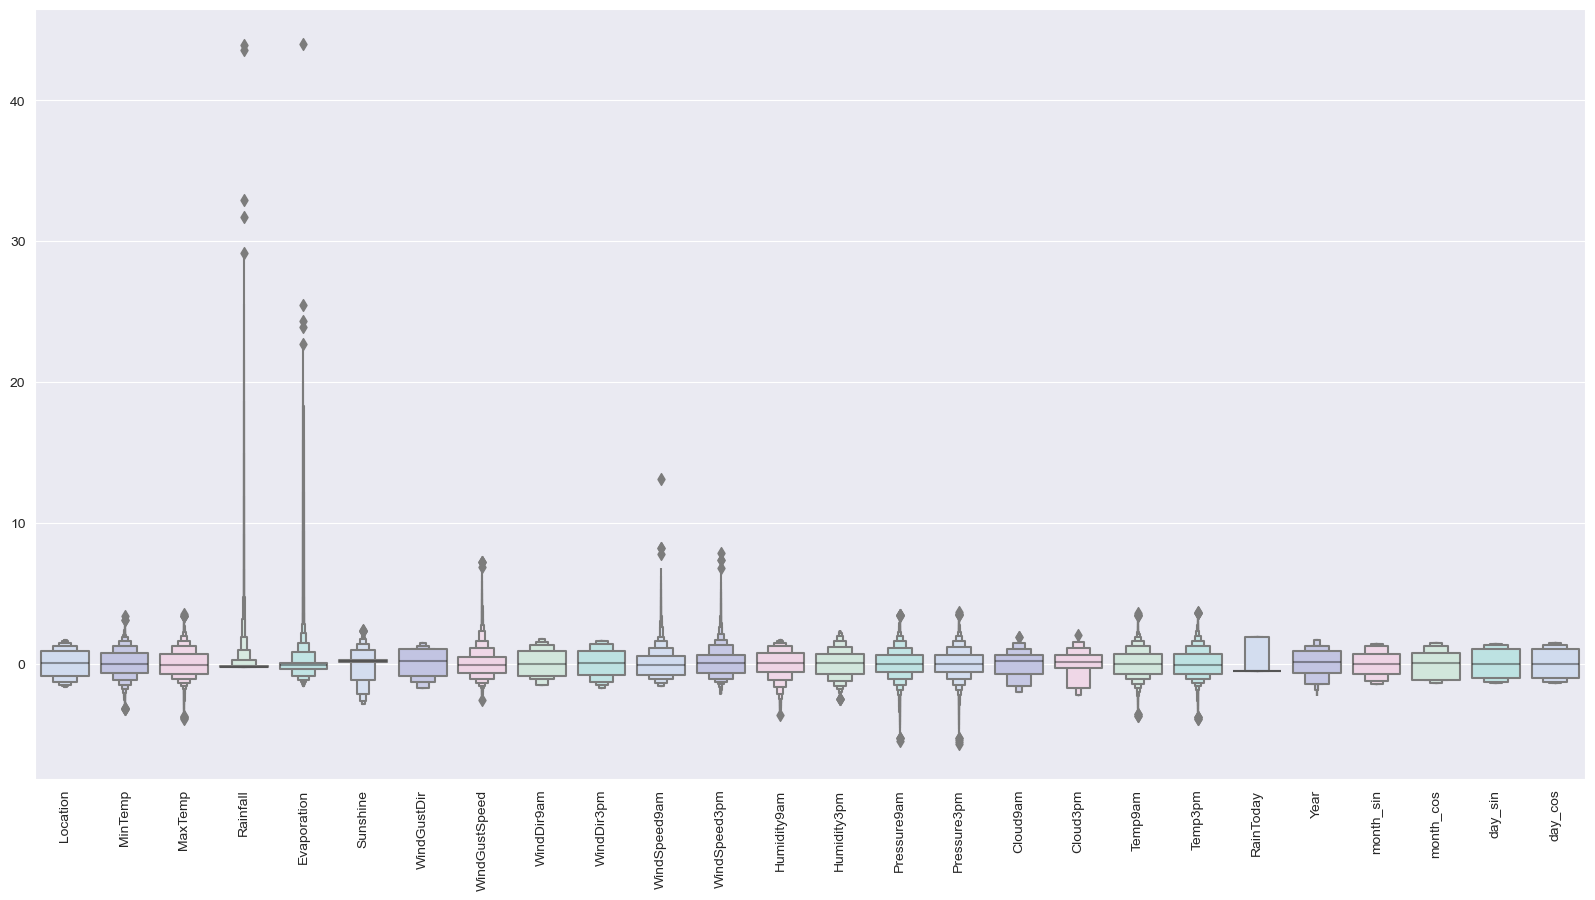

In [31]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours, saturation = 1)
plt.xticks(rotation=90)
plt.show()

In [32]:
# Add the target variable 'RainTomorrow' back to the features DataFrame
features["RainTomorrow"] = target

# Dropping rows with outliers based on specific conditions for each column

features = features[(features["MinTemp"] < 2.3) & (features["MinTemp"] > -2.3)]
features = features[(features["MaxTemp"] < 2.3) & (features["MaxTemp"] > -2)]
features = features[(features["Rainfall"] < 4.5)]
features = features[(features["Evaporation"] < 2.8)]
features = features[(features["Sunshine"] < 2.1)]
features = features[(features["WindGustSpeed"] < 4) & (features["WindGustSpeed"] > -4)]
features = features[(features["WindSpeed9am"] < 4)]
features = features[(features["WindSpeed3pm"] < 2.5)]
features = features[(features["Humidity9am"] > -3)]
features = features[(features["Humidity3pm"] > -2.2)]
features = features[(features["Pressure9am"] < 2) & (features["Pressure9am"] > -2.7)]
features = features[(features["Pressure3pm"] < 2) & (features["Pressure3pm"] > -2.7)]
features = features[(features["Cloud9am"] < 1.8)]
features = features[(features["Cloud3pm"] < 2)]
features = features[(features["Temp9am"] < 2.3) & (features["Temp9am"] > -2)]
features = features[(features["Temp3pm"] < 2.3) & (features["Temp3pm"] > -2)]

# Display the shape of the processed features DataFrame
features.shape


(127536, 27)

<Axes: >

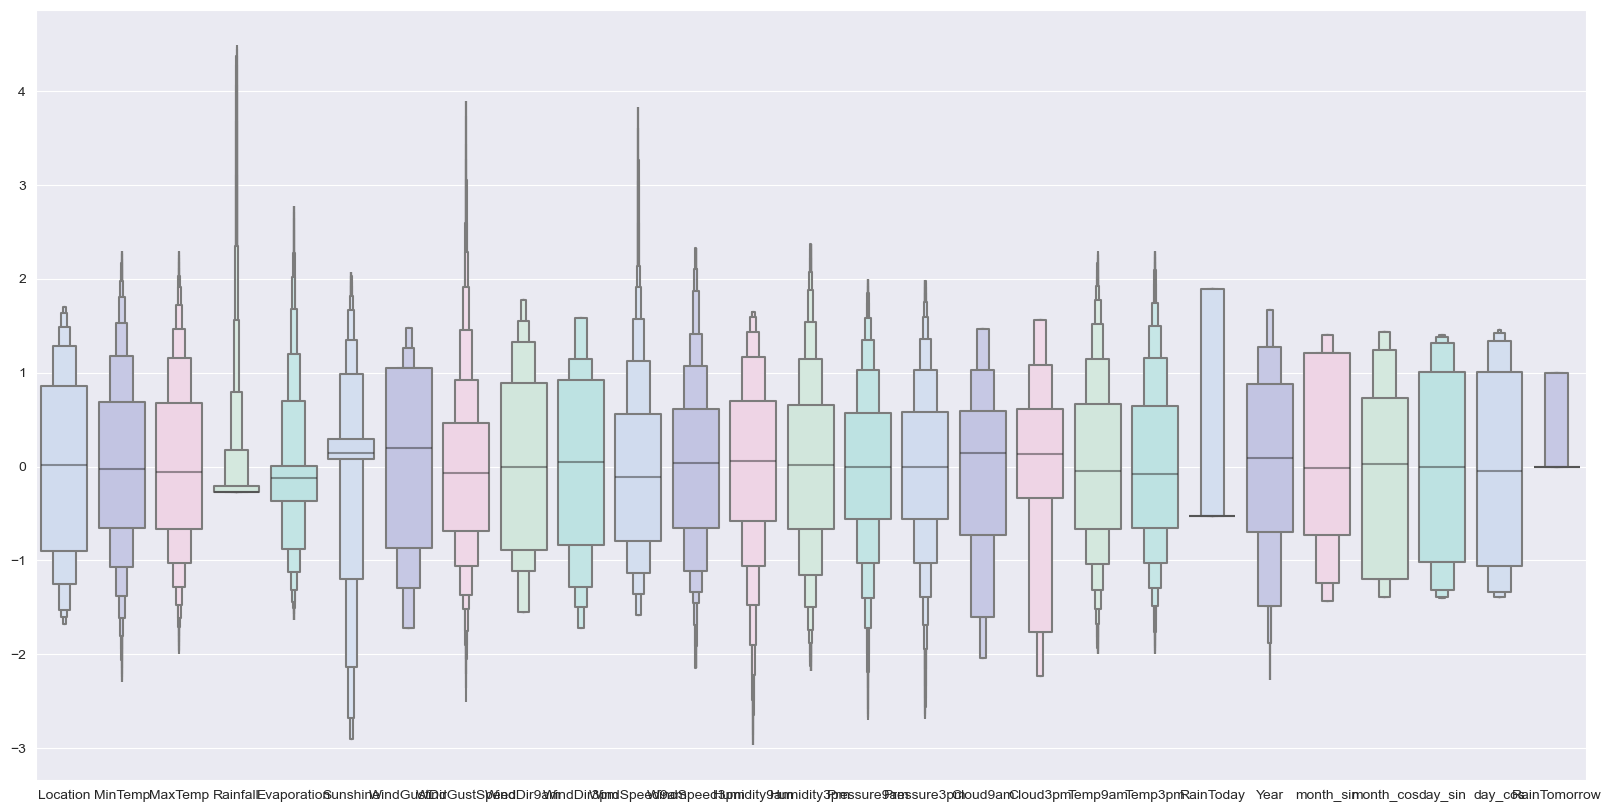

In [33]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours, saturation = 1)

# Model Building

### In this project, we construct an artificial neural network. The model-building process includes the following steps:

1. Assigning X and y to represent the features and labels.
2. Splitting the dataset into training and testing sets.
3. Initializing the neural network.
4. Defining the architecture by adding layers.
5. Compiling the neural network.
6. Training the neural network.

In [34]:
X = features.drop(['RainTomorrow'], axis = 1)
y = features['RainTomorrow']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
print("Shape of X: ", X.shape)
print("\nShape of X_train: ", X_train.shape)
print("\nShape of y_train: ", y_train)

Shape of X:  (127536, 26)

Shape of X_train:  (102028, 26)

Shape of y_train:  86273     1
50165     1
91023     0
50576     1
45395     1
         ..
136169    0
118292    0
972       0
17427     0
139021    0
Name: RainTomorrow, Length: 102028, dtype: int32


In [37]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 20, restore_best_weights = True)

In [42]:
# Initializing the ANN model
ann = Sequential()

# Adding the layers
ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.25))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.5))

In [43]:
#adding the output layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [44]:
# Compling the model
opt = Adam(learning_rate = 0.00009)
ann.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [45]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2551/2551 [==============================] - 15s 5ms/step - loss: 0.4961 - accuracy: 0.7842 - val_loss: 0.3929 - val_accuracy: 0.7860
Epoch 2/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4195 - accuracy: 0.8002 - val_loss: 0.3842 - val_accuracy: 0.8403
Epoch 3/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4109 - accuracy: 0.8145 - val_loss: 0.3744 - val_accuracy: 0.8419
Epoch 4/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4021 - accuracy: 0.8324 - val_loss: 0.3679 - val_accuracy: 0.8423
Epoch 5/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.3980 - accuracy: 0.8377 - val_loss: 0.3653 - val_accuracy: 0.8427
Epoch 6/150
2551/2551 [==============================] - 13s 5ms/step - loss: 0.3966 - accuracy: 0.8373 - val_loss: 0.3637 - val_accuracy: 0.8442
Epoch 7/150
2551/2551 [==============================] - 14s 5ms/step - loss: 0.3927 - accuracy: 0.8376 - val_loss: 0.3619 -

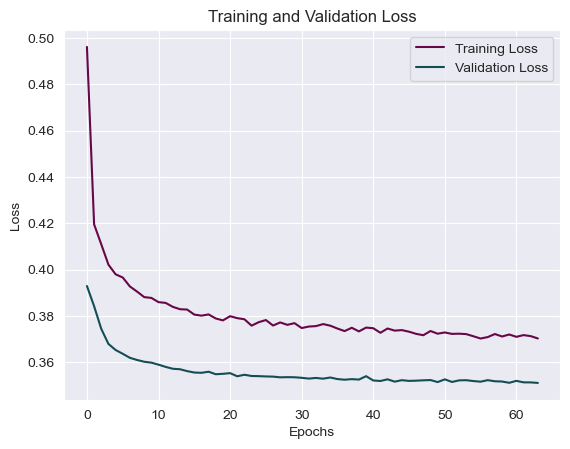

In [46]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']], "#680747", label = 'Training Loss')
plt.plot(history_df.loc[:,['val_loss']], '#144D53', label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()

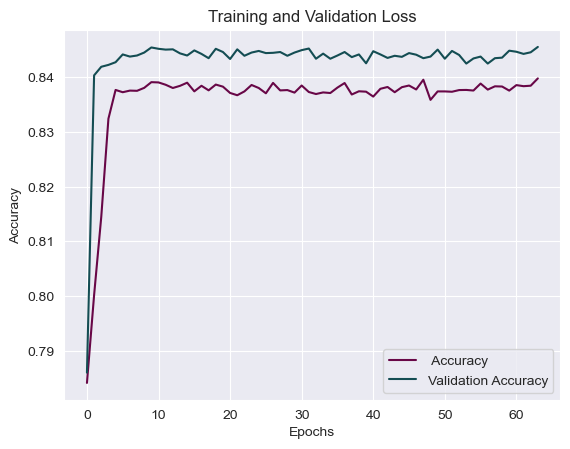

In [47]:
plt.plot(history_df.loc[:,['accuracy']], "#680747", label = ' Accuracy')
plt.plot(history_df.loc[:,['val_accuracy']], '#144D53', label = 'Validation Accuracy')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "best")
plt.show()

In [48]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

798/798 [==============================] - 2s 2ms/step


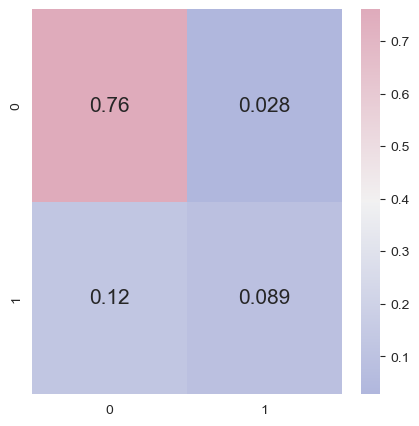

In [54]:
cmap1 = sns.diverging_palette(260, -10, s = 50, l = 75, n = 5, as_cmap = True)
plt.subplots(figsize = (5,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size': 15})
plt.show()

In [57]:
print("Classification report:- \n\n", classification_report(y_test, y_pred))

Classification report:- 

               precision    recall  f1-score   support

           0       0.86      0.96      0.91     20110
           1       0.76      0.42      0.54      5398

    accuracy                           0.85     25508
   macro avg       0.81      0.69      0.73     25508
weighted avg       0.84      0.85      0.83     25508

